In [100]:
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('newmodel.h5')


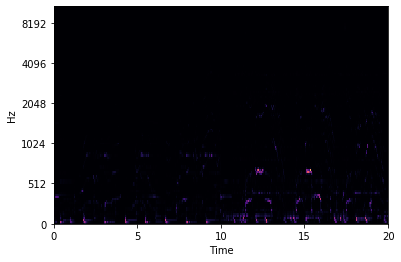

In [101]:
import os
import librosa 
import librosa.display
from pydub import AudioSegment
import numpy as np
from IPython.display import Audio

SOURCES = "./DSD100subset/Mixtures/Test"
y_total = np.array([])
sr = 1
for directory in [x for x in next(os.walk(SOURCES))[1]]:
    y, sr = librosa.load(os.path.join(SOURCES, directory, 'mixture.wav'), duration=10)
    y_total = np.concatenate((y_total, y))


ps = librosa.feature.melspectrogram(y=y_total, sr=sr)
librosa.display.specshow(ps, y_axis="mel", x_axis="time")

In [103]:
display(Audio(y_total, rate=sr))

In [104]:
cl = 24
scl = int(cl/2)
x_test = []
n_mels, t = ps.shape
for i in range(scl, t-scl):
    x_test.append(ps[:, i-scl:i+scl+1])
x_test = np.expand_dims(np.array(x_test), axis=3)
print(x_test.shape)
print(ps.shape)    

(838, 128, 25, 1)
(128, 862)


In [105]:
result = model.predict(x_test)
print(result.shape)


(838, 128)


In [106]:
t = np.transpose(result)
t.shape

(128, 838)

In [ ]:
# vocals_ps = None
# for i in range(len(result)):
#     if result[i] > 0.5:
#         v = np.expand_dims(ps[:, i], axis=1)
#         vocals_ps = np.concatenate((vocals_ps, v), axis=1) if vocals_ps is not None else v
# print(vocals_ps.shape)

In [107]:
inv_vocal_ps = librosa.feature.inverse.mel_to_audio(t)

In [109]:
display(Audio(inv_vocal_ps, rate=sr))